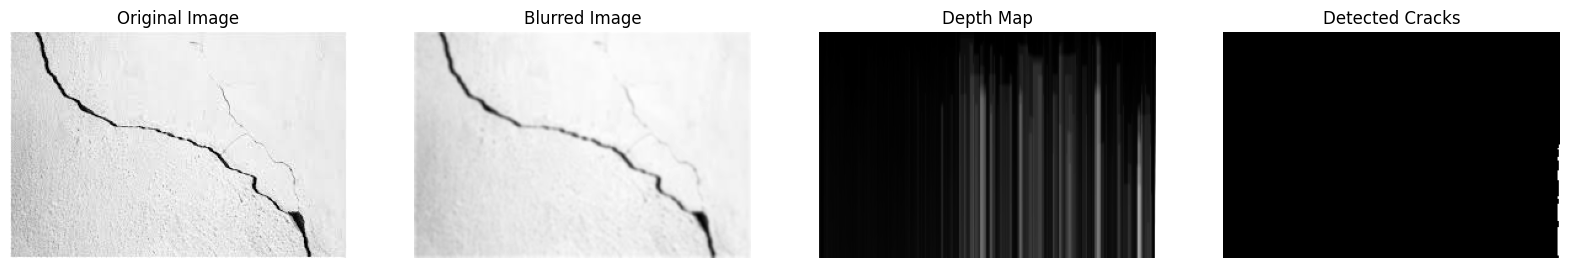

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
image = cv2.imread('crack2.jpeg', cv2.IMREAD_GRAYSCALE)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Estimate surface normals based on image gradients (Sobel filters)
def estimate_normals(image):
    # Gradient in x and y directions
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    
    # Normalize the gradients to compute normals
    normals = np.dstack((grad_x, grad_y, np.ones_like(image, dtype=np.float64)))
    normals = normals / np.linalg.norm(normals, axis=2, keepdims=True)
    
    return normals

# Step 3: Depth estimation by integrating the normals
def estimate_depth(normals):
    depth = np.zeros_like(normals[:, :, 0])
    
    # Simple approximation using cumulative sum
    depth += np.cumsum(normals[:, :, 2], axis=0)
    return depth

# Estimate normals and depth map
normals = estimate_normals(blurred)
depth_map = estimate_depth(normals)

# Step 4: Crack detection using edge detection on depth map
edges = cv2.Canny(np.uint8(depth_map), 100, 200)

# Step 5: Post-processing with morphological operations to refine cracks
kernel = np.ones((3, 3), np.uint8)
cracks = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Visualization using Matplotlib
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Original Image
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

# Blurred Image
ax[1].imshow(blurred, cmap='gray')
ax[1].set_title('Blurred Image')
ax[1].axis('off')

# Depth Map Visualization
ax[2].imshow(depth_map, cmap='gray')
ax[2].set_title('Depth Map')
ax[2].axis('off')

# Detected Cracks
ax[3].imshow(cracks, cmap='gray')
ax[3].set_title('Detected Cracks')
ax[3].axis('off')

plt.show()


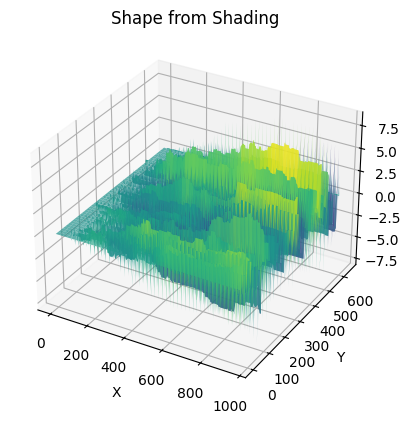

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def shape_from_shading_horn_schunck(image):
    # Preprocessing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = gray / 255.0

    # Compute image gradient
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Integrate the gradient field
    height, width = gray.shape
    u = np.zeros((height, width))
    v = np.zeros((height, width))
    lambda_ = 1.0  # Regularization parameter

    for iteration in range(100):
        u_prev = u.copy()
        v_prev = v.copy()

        p = Ix + lambda_ * u
        q = Iy + lambda_ * v

        u = u_prev - (p * Ix + q * Iy) / (lambda_ + Ix**2 + Iy**2)
        v = v_prev - (p * Iy - q * Ix) / (lambda_ + Ix**2 + Iy**2)

    # Reconstruct the surface
    depth = np.zeros((height, width))
    depth[0, 0] = 0.0  # Set a reference point

    for y in range(1, height):
        for x in range(1, width):
            depth[y, x] = depth[y - 1, x] + u[y - 1, x]
            depth[y, x] = depth[y, x - 1] + v[y, x]

    return depth

# Load the image
image = cv2.imread('cracking.jpg')

# Perform shape from shading
depth = shape_from_shading_horn_schunck(image)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate meshgrid
x, y = np.meshgrid(np.arange(depth.shape[1]), np.arange(depth.shape[0]))

# Plot the surface
ax.plot_surface(x, y, depth, cmap='viridis', alpha=0.7)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Shape from Shading')

plt.show()

In [4]:
import numpy as np
import cv2

def shape_from_shading_horn_schunck(image):
    # Preprocessing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = gray / 255.0

    # Compute image gradient
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Integrate the gradient field
    height, width = gray.shape
    u = np.zeros((height, width))
    v = np.zeros((height, width))
    lambda_ = 1.0  # Regularization parameter

    for iteration in range(100):
        u_prev = u.copy()
        v_prev = v.copy()

        p = Ix + lambda_ * u
        q = Iy + lambda_ * v

        u = u_prev - (p * Ix + q * Iy) / (lambda_ + Ix**2 + Iy**2)
        v = v_prev - (p * Iy - q * Ix) / (lambda_ + Ix**2 + Iy**2)

    # Reconstruct the surface
    depth = np.zeros((height, width))
    depth[0, 0] = 0.0  # Set a reference point

    for y in range(1, height):
        for x in range(1, width):
            depth[y, x] = depth[y - 1, x] + u[y - 1, x]
            depth[y, x] = depth[y, x - 1] + v[y, x]

    return depth

# Load the image
image = cv2.imread('cracking.jpg')

# Perform shape from shading
depth = shape_from_shading_horn_schunck(image)

# Visualize the depth map
cv2.imshow('Depth Map', cv2.normalize(depth, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1))
cv2.waitKey(0)
cv2.destroyAllWindows()

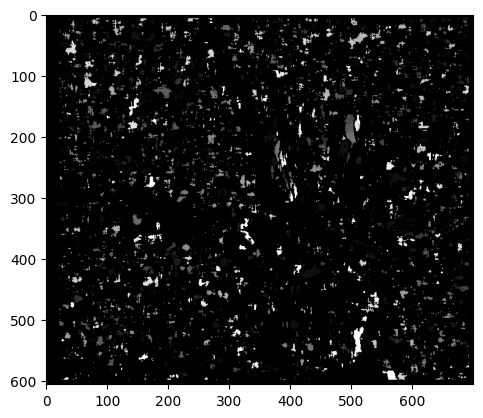

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# read two input images
imgL = cv2.imread('aloeL.jpg',0)
imgR = cv2.imread('aloeR.jpg',0)

# Initiate and StereoBM object
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)

# compute the disparity map
disparity = stereo.compute(imgL,imgR)
disparity1 = stereo.compute(imgR,imgL)
plt.imshow(disparity,'gray')
plt.show()